# Importación de Librerías Necesarias

In [1]:
# CNN
import os
import keras
import scipy
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
import random, shutil
from keras.models import Sequential
from keras.layers import (
    Dropout,
    Conv2D,
    Flatten,
    Dense,
    MaxPooling2D,
    BatchNormalization,
)
from keras.models import load_model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
from PIL import Image


# Generador de imágenes Normal

In [2]:
def generator(
    dir=r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\dataset_new",
    gen=ImageDataGenerator(rescale=1.0 / 255),
    shuffle=True,
    batch_size=1,
    target_size=(24, 24),
    class_mode="categorical",
):

    return gen.flow_from_directory(
        dir,
        batch_size=batch_size,
        shuffle=shuffle,
        color_mode="grayscale",
        class_mode=class_mode,
        target_size=target_size,
    )

# Verificar CUDA para uso de GPU

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

import multiprocessing
print("Número de núcleos de CPU disponibles: ", multiprocessing.cpu_count())

Num GPUs Available:  1
Número de núcleos de CPU disponibles:  12


# Carga de Imágenes

In [4]:
BS = 32
TS = (24, 24)

# Generar los datos de entrenamiento con Generador Normal
train_batch = generator(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\dataset_new\train", shuffle=True, batch_size=BS, target_size=TS)

# Generar los datos de entrenamiento con Generador Normal
valid_batch = generator(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\dataset_new\test", shuffle=True, batch_size=BS, target_size=TS)

SPE = len(train_batch.classes) // BS #Paso por épocas (Steps per Epoch)
VS = len(valid_batch.classes) // BS #Paso de validación (Validation Step)
print(SPE, VS)

img, labels = next(train_batch)
print(img.shape)


Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
38 6
(32, 24, 24, 1)


# Modelo de CNN

In [5]:
cnn_model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(24, 24, 1)),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(32, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D(pool_size=(1, 1)),
        Dropout(0.25),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),
        Dense(2, activation="softmax"),
    ]
)

# Compilador de la CNN

In [6]:
cnn_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)

# Entrenamiento del modelo

In [7]:
cnn_model.fit(
    train_batch,
    validation_data=valid_batch,
    epochs=50,
    steps_per_epoch=SPE,
    validation_steps=VS,
    use_multiprocessing=False,
    workers=4,
    max_queue_size=32
)
cnn_model.save(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\models\cnnDD1.h5", overwrite=True)

Epoch 1/50
38/38 [==============================] - 4s 28ms/step - loss: 0.4699 - accuracy: 0.7912 - val_loss: 0.2327 - val_accuracy: 0.8906
Epoch 2/50
38/38 [==============================] - 1s 32ms/step - loss: 0.2226 - accuracy: 0.9210 - val_loss: 0.1675 - val_accuracy: 0.9271
Epoch 3/50
38/38 [==============================] - 1s 30ms/step - loss: 0.1444 - accuracy: 0.9476 - val_loss: 0.1405 - val_accuracy: 0.9479
Epoch 4/50
38/38 [==============================] - 1s 32ms/step - loss: 0.1139 - accuracy: 0.9551 - val_loss: 0.1162 - val_accuracy: 0.9427
Epoch 5/50
38/38 [==============================] - 1s 33ms/step - loss: 0.1023 - accuracy: 0.9676 - val_loss: 0.1347 - val_accuracy: 0.9479
Epoch 6/50
38/38 [==============================] - 1s 31ms/step - loss: 0.0803 - accuracy: 0.9659 - val_loss: 0.1231 - val_accuracy: 0.9531
Epoch 7/50
38/38 [==============================] - 1s 32ms/step - loss: 0.0953 - accuracy: 0.9659 - val_loss: 0.1610 - val_accuracy: 0.9323
Epoch 8/50
38

# Métricas "precision", "recall", "F1" y "accuracy"

In [3]:
# Extraer los nombres de las clases para el reporte
train_generator = generator(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\dataset_new\test_augmented")
num_classes = len(train_generator.class_indices)
class_names = [k for k, v in sorted(train_generator.class_indices.items(), key=lambda item: item[1])]
print(class_names)

Found 5950 images belonging to 2 classes.
['Closed', 'Open']


In [4]:
# Conjunto de validación separado

val_datagen = ImageDataGenerator(rescale=1.0/255)

valid_data = val_datagen.flow_from_directory(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\dataset_new\test_augmented",
    target_size=(24, 24),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 5950 images belonging to 2 classes.


In [5]:
# Predicciones para el conjunto de validación y calcular las métricas
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

#Carga del modelo entrenado
cnn_model = load_model(r"C:\Users\acer.LAPTOP-5D7SPG9D\Desktop\Isaac\YachayTech\10mo Semestre\Neuronal Networks\Project_NN\models\cnnDD1.h5")


Y_pred = cnn_model.predict_generator(valid_data, steps=len(valid_data))
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(valid_data.classes, y_pred))
print('Classification Report')
target_names = class_names
print(classification_report(valid_data.classes, y_pred, target_names=target_names))

C:\Users\acer.LAPTOP-5D7SPG9D\AppData\Local\Temp\ipykernel_1248\1075686003.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn_model.predict_generator(valid_data, steps=len(valid_data))


Confusion Matrix
[[2799  176]
 [ 223 2752]]
Classification Report
              precision    recall  f1-score   support

      Closed       0.93      0.94      0.93      2975
        Open       0.94      0.93      0.93      2975

    accuracy                           0.93      5950
   macro avg       0.93      0.93      0.93      5950
weighted avg       0.93      0.93      0.93      5950



# Gráficas de "precision", "recall", "F1" y "accuracy"

C:\Users\acer.LAPTOP-5D7SPG9D\AppData\Local\Temp\ipykernel_8752\4108852081.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = cnn_model.predict_generator(valid_data, steps=len(valid_data))


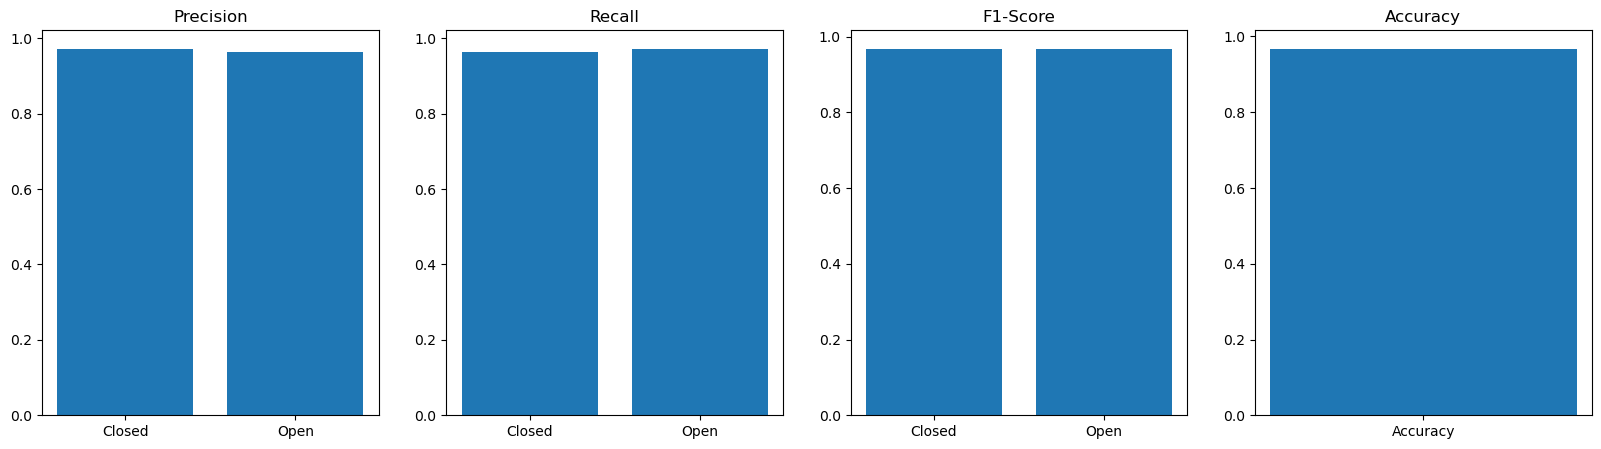

In [12]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Obtener las predicciones y los verdaderos valores
Y_pred = cnn_model.predict_generator(valid_data, steps=len(valid_data))
y_pred = np.argmax(Y_pred, axis=1)
y_true = valid_data.classes

# Calcular las métricas
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average=None)
accuracy = accuracy_score(y_true, y_pred)

# Graficar las métricas
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].bar(class_names, precision)
ax[0].set_title('Precision')
ax[1].bar(class_names, recall)
ax[1].set_title('Recall')
ax[2].bar(class_names, f1_score)
ax[2].set_title('F1-Score')
ax[3].bar(['Accuracy'], [accuracy])
ax[3].set_title('Accuracy')
plt.show()